In [1]:
import pandas as pd

In [2]:
# Name the variable that holds the series fruits.
fruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"])

In [3]:
# Run .describe() on the series to see what describe returns for a series of strings.
fruits.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

In [5]:
# Run the code necessary to produce only the unique fruit names.
fruits.unique()

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

In [22]:
# Determine how many times each value occurs in the series.
fruits.value_counts()

kiwi                4
mango               2
watermelon          1
gooseberry          1
tomato              1
gala apple          1
pineapple           1
blackberry          1
honeycrisp apple    1
papaya              1
blueberry           1
honeydew            1
strawberry          1
dtype: int64

In [7]:
# Determine the most frequently occurring fruit name from the series.
fruits.mode()

0    kiwi
dtype: object

In [225]:
# Determine the least frequently occurring fruit name from the series.
fruits.value_counts().nsmallest(n=1, keep='all')

watermelon          1
gooseberry          1
tomato              1
gala apple          1
pineapple           1
blackberry          1
honeycrisp apple    1
papaya              1
blueberry           1
honeydew            1
strawberry          1
dtype: int64

In [48]:
# Write the code to get the longest string from the fruits series.
lengths = [len(string) for string in fruits]
ind = lengths.index(max(lengths))
fruits[ind]

'honeycrisp apple'

In [46]:
# Find the fruit(s) with 5 or more letters in the name.
fruits[fruits.apply(lambda s: len(s) >= 5)]

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

In [26]:
# Capitalize all the fruit strings in the series.
fruits.apply(lambda s: s.upper())

0                 KIWI
1                MANGO
2           STRAWBERRY
3            PINEAPPLE
4           GALA APPLE
5     HONEYCRISP APPLE
6               TOMATO
7           WATERMELON
8             HONEYDEW
9                 KIWI
10                KIWI
11                KIWI
12               MANGO
13           BLUEBERRY
14          BLACKBERRY
15          GOOSEBERRY
16              PAPAYA
dtype: object

In [28]:
# Count the letter "a" in all the fruits (use string vectorization)
sum(fruits.str.count('a'))

14

In [228]:
# Output the number of vowels in each and every fruit.
ovowels = fruits.str.count(r'[aeiou]')
vowels = pd.DataFrame({'Fruits': fruits, 'Vowels': ovowels})
vowels

,Fruits,Vowels
0,kiwi,2
1,mango,2
2,strawberry,2
3,pineapple,4
4,gala apple,4
5,honeycrisp apple,5
6,tomato,3
7,watermelon,4
8,honeydew,3
9,kiwi,2


In [45]:
# Use the .apply method and a lambda function to find the fruit(s) containing two or more "o" letters in the name.
fruits[fruits.apply(lambda s: s.count('o') >= 2)]


6         tomato
15    gooseberry
dtype: object

In [50]:
# Write the code to get only the fruits containing "berry" in the name
fruits[fruits.str.contains('berry')]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

In [51]:
# Write the code to get only the fruits containing "apple" in the name
fruits[fruits.str.contains('apple')]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

In [52]:
# Which fruit has the highest amount of vowels?
fruits[max(fruits.str.count(r'[aeiou]'))]

'honeycrisp apple'

In [53]:
money = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23'])

In [62]:
# What is the data type of the series?
money

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64

In [61]:
# Use series operations to convert the series to a numeric data type.
money = money.apply(lambda f: f.replace(',', ''))
money = money.apply(lambda f: f.replace('$', ''))
money = money.apply(lambda f: float(f))

AttributeError: 'float' object has no attribute 'replace'

In [63]:
money

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64

In [66]:
# What is the maximum value? The minimum?
print(max(money))
min(money)

4789988.17


278.6

In [102]:
# Bin the data into 4 equally sized intervals and show how many values fall into each bin.
group = pd.cut(money, [0, 1200000, 2400000, 3600000, 4800000])
group.value_counts()

(0, 1200000]          7
(3600000, 4800000]    6
(1200000, 2400000]    4
(2400000, 3600000]    3
dtype: int64

<AxesSubplot:title={'center':'Histogram of Money'}, xlabel='Money Bins', ylabel='Frequency'>

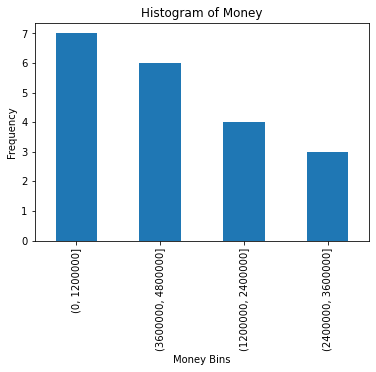

In [200]:
# Plot a histogram of the data. Be sure to include a title and axis labels.
group.value_counts().plot.bar(title = 'Histogram of Money', xlabel = 'Money Bins', ylabel = 'Frequency')


In [104]:
exam_scores = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78]
)

In [105]:
# What is the minimum exam score? The max, mean, median?
print(exam_scores.min())
print(exam_scores.max())
print(exam_scores.mean())
print(exam_scores.median())

60
96
78.15
79.0


In [111]:
exam_group = pd.cut(exam_scores, [59, 69, 79, 89, 100])
exam_group.value_counts()

(79, 89]     6
(69, 79]     5
(59, 69]     5
(89, 100]    4
dtype: int64

<AxesSubplot:title={'center':'Histogram of Scores'}, xlabel='Score Bins', ylabel='Frequency'>

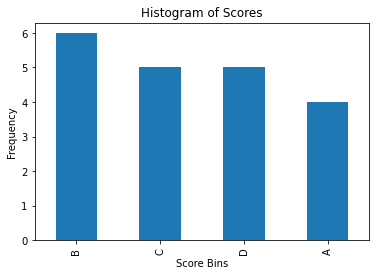

In [114]:
# Plot a histogram of the scores.
exam_group.value_counts().plot.bar(title = 'Histogram of Scores', xlabel = 'Score Bins', ylabel = 'Frequency')

In [113]:
# Convert each of the numbers above into a letter grade. For example, 86 should be a 'B' and 95 should be an 'A'.
exam_group = pd.cut(exam_scores, [59, 69, 79, 89, 100], labels = ['D', 'C', 'B', 'A'])

In [115]:
# Write the code necessary to implement a curve. I.e. that grade closest to 100 should be converted to a 
# 100, and that many points should be given to every other score as well.
Diff = 100 - max(exam_scores)
exam_scores.apply(lambda b: b + Diff)

0      64
1      90
2      79
3      66
4      97
5      75
6      64
7      87
8      99
9      82
10     69
11     76
12     73
13     85
14    100
15     84
16     89
17     96
18     86
19     82
dtype: int64

In [201]:
letters = 'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'
nletters = pd.Series(list(letters))
nletters

0      h
1      n
2      v
3      i
4      d
      ..
195    r
196    o
197    g
198    u
199    y
Length: 200, dtype: object

In [202]:
# What is the most frequently occuring letter? Least frequently occuring?
print(nletters[max(nletters.value_counts())])
print(nletters[min(nletters.value_counts())])

y
d


In [211]:
# How many vowels are in the list?
sum(nletters.str.count(r'[aeiou]'))

34

In [204]:
# How many consonants are in the list?
sum(nletters.str.count(r'[bcdfghjklmnpqrstvwxyz]'))

166

In [205]:
# Create a series that has all of the same letters, but uppercased
nletters.apply(lambda t: t.upper())

0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object

In [206]:
# Create a bar plot of the frequencies of the 6 most frequently occuring letters.
nletters.value_counts().head(6)


y    13
p    12
w    10
k     9
m     9
b     9
dtype: int64

<AxesSubplot:title={'center':'Frequency of Letters'}, xlabel='Letters', ylabel='Frequency'>

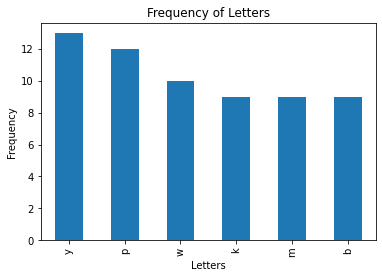

In [207]:
nletters.value_counts().head(6).plot.bar(title = 'Frequency of Letters', xlabel = 'Letters', ylabel = 'Frequency')

In [208]:
nfruits = ['mango', 'kiwi', 'strawberry', 'guava', 'pineapple', 'mandarin orange']
nfruits = pd.Series(nfruits)

In [209]:
numbers = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 17, 19, 23, 256, -8, -4, -2, 5, -9]
numbers = pd.Series(numbers)

In [153]:
# Uppercase the nfruits series
nfruits.apply(lambda s: s.upper())

0              MANGO
1               KIWI
2         STRAWBERRY
3              GUAVA
4          PINEAPPLE
5    MANDARIN ORANGE
dtype: object

In [154]:
# capitalize the nfruits series
nfruits.apply(lambda s: s.capitalize())

0              Mango
1               Kiwi
2         Strawberry
3              Guava
4          Pineapple
5    Mandarin orange
dtype: object

In [157]:
# get all fruits with more than two vowels
nfruits[nfruits.str.count(r'[aeiou]') > 2]

3              guava
4          pineapple
5    mandarin orange
dtype: object

In [159]:
# get fruits with exactly two vowels
nfruits[nfruits.str.count(r'[aeiou]') == 2]

0         mango
1          kiwi
2    strawberry
dtype: object

In [161]:
# make a list that contains each fruit with more than 5 characters
nfruits[nfruits.apply(lambda s: len(s)) > 5]

2         strawberry
4          pineapple
5    mandarin orange
dtype: object

In [162]:
# make a list that contains each fruit with exactly 5 characters
nfruits[nfruits.apply(lambda s: len(s)) == 5]

0    mango
3    guava
dtype: object

In [163]:
# Make a list that contains fruits that have less than 5 characters
nfruits[nfruits.apply(lambda s: len(s)) < 5]

1    kiwi
dtype: object

In [198]:
# Make a list containing the number of characters in each fruit.
nfruits.apply(lambda s: len(s))

0     5
1     4
2    10
3     5
4     9
5    15
dtype: int64

In [169]:
# Make a variable named fruits_with_letter_a that contains a list of only the fruits that contain the letter "a"
nfruits[nfruits.str.contains('a')]

0              mango
2         strawberry
3              guava
4          pineapple
5    mandarin orange
dtype: object

In [179]:
# Make a variable named even_numbers that holds only the even numbers 
numbers[numbers % 2 == 0]

0       2
2       4
4       6
6       8
8      10
14    256
15     -8
16     -4
17     -2
dtype: int64

In [181]:
# Make a variable named odd_numbers that holds only the odd numbers
numbers[numbers % 2 != 0]

1      3
3      5
5      7
7      9
9     11
10    13
11    17
12    19
13    23
18     5
19    -9
dtype: int64

In [182]:
# Make a variable named positive_numbers that holds only the positive numbers
numbers[numbers > 0]

0       2
1       3
2       4
3       5
4       6
5       7
6       8
7       9
8      10
9      11
10     13
11     17
12     19
13     23
14    256
18      5
dtype: int64

In [196]:
# Make a variable named negative_numbers that holds only the negative numbers
numbers[numbers < 0]

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16     True
17     True
18    False
19     True
dtype: bool

In [195]:
#use a list comprehension w/ a conditional in order to produce a list of numbers with 2 or more numerals
numbers[numbers.apply(lambda s: s <= -10 or s >= 10)]

8      10
9      11
10     13
11     17
12     19
13     23
14    256
dtype: int64

In [193]:
# Make a variable named numbers_squared that contains the numbers list with each element squared.
numbers**2

0         4
1         9
2        16
3        25
4        36
5        49
6        64
7        81
8       100
9       121
10      169
11      289
12      361
13      529
14    65536
15       64
16       16
17        4
18       25
19       81
dtype: int64

In [229]:
# Make a variable named odd_negative_numbers that contains only the numbers that are both odd and negative.
numbers[numbers.apply(lambda s: s < 0 and s % 2 != 0)]

19   -9
dtype: int64

In [192]:
# Make a variable named numbers_plus_5. In it, return a list containing each number plus five. 
numbers + 5

0       7
1       8
2       9
3      10
4      11
5      12
6      13
7      14
8      15
9      16
10     18
11     22
12     24
13     28
14    261
15     -3
16      1
17      3
18     10
19     -4
dtype: int64

In [223]:
# Make a list containing only prime numbers from the list
def get_the_primes(x):  
    primes = []
    for number in list(x):
        counter = 0
        for i in range(1, number + 1):
            if number % i == 0:
                counter = counter + 1
        if counter == 2:
            primes.append(number)
    print(primes)
            

In [224]:
get_the_primes(numbers)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 5]
